# Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [2]:
df_1 = pd.read_csv("50_Startups.csv")
df_1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df_1.shape

(50, 5)

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df_1['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [6]:
df_1 = pd.get_dummies(df_1,columns=['State'])
df_1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&D Spend         50 non-null     float64
 1   Administration    50 non-null     float64
 2   Marketing Spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_New York    50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [8]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83
State_California,50.0,0.3400,0.478518,0.00,0.0000,0.000,1.0000,1.00
State_Florida,50.0,0.3200,0.471212,0.00,0.0000,0.000,1.0000,1.00
State_New York,50.0,0.3400,0.478518,0.00,0.0000,0.000,1.0000,1.00



 Printing the plot for features : R&D Spend
************************************


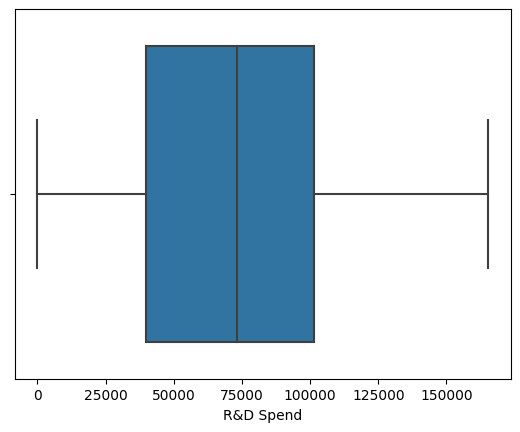


 Printing the plot for features : Administration
************************************


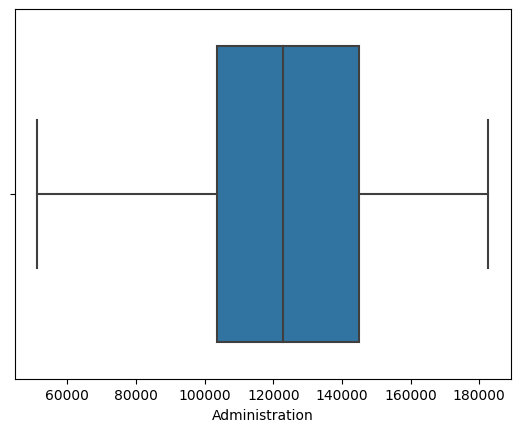


 Printing the plot for features : Marketing Spend
************************************


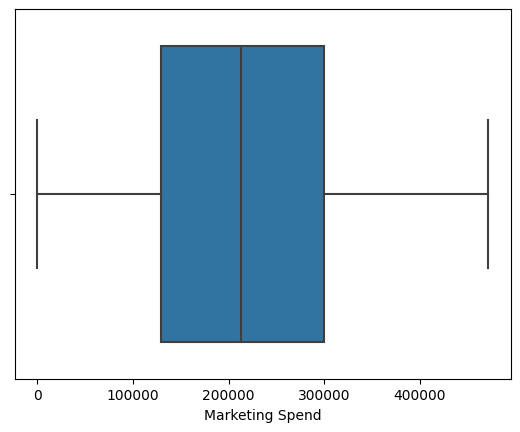


 Printing the plot for features : Profit
************************************


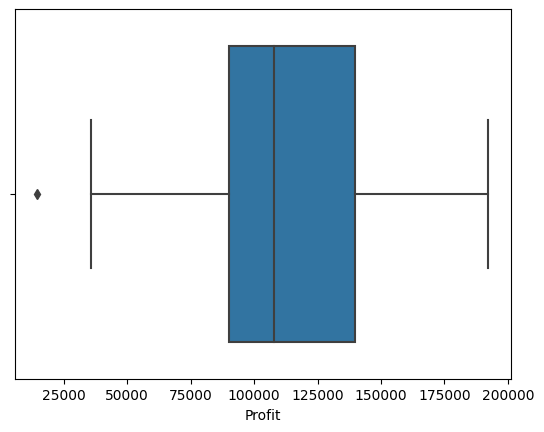

In [9]:
for i in df_1.columns:
    if i!='State_California':
         if df_1[i].dtypes == 'int64' or df_1[i].dtypes == 'float64':
            print("\n Printing the plot for features :",i)
            print("************************************")
            sns.boxplot(x=i, data = df_1)
            plt.show()

# Correlation between independent and dependent variables

# Bivariate plots

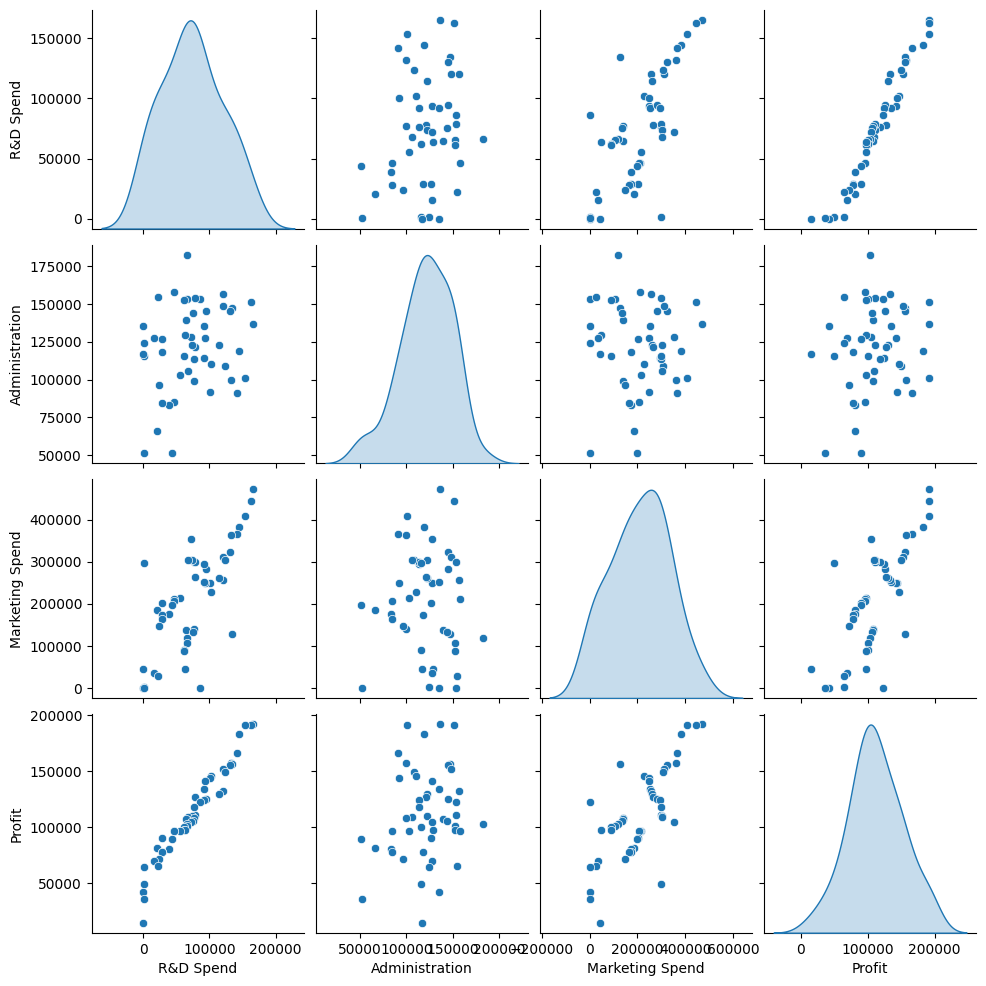

In [10]:
df_1_attr = df_1.iloc[:,0:4]
sns.pairplot(df_1_attr,diag_kind = 'kde')
plt.show()

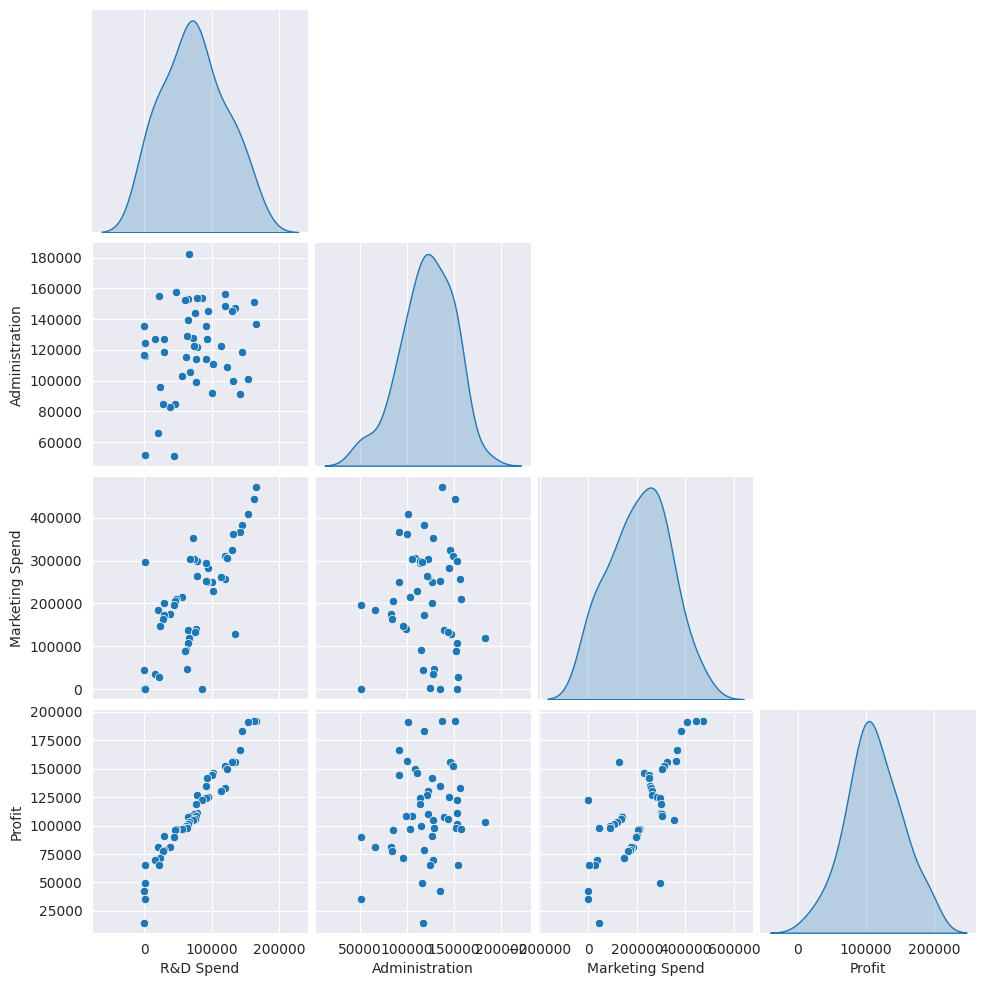

In [11]:
sns.set_style(style='darkgrid')
df_1_attr = df_1.iloc[:,0:4]
sns.pairplot(df_1_attr,corner=True, diag_kind='kde')
plt.show()

In [12]:
df_1.iloc[:,0:4].corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


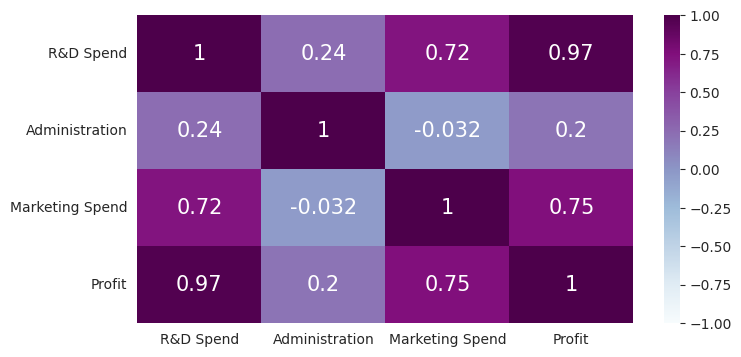

In [13]:
plt.figure(figsize=(8,4))
sns.heatmap(df_1.iloc[:,0:4].corr(),annot = True, vmin = -1, vmax = 1, cmap ='BuPu',annot_kws ={'size':15})
plt.show()

# Using OLS method for Linear Regression

# Start with Simple Linear regression

# Administration

In [14]:
#model
import statsmodels.formula.api as smf

myformula = 'Profit~Administration'
model = smf.ols(myformula,data=df_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.162
Time:                        11:53:57   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
print('The variation of dependent variable (Profit) explained by independent variable (Administration) is',model.rsquared*100,'%')

The variation of dependent variable (Profit) explained by independent variable (Administration) is 4.028714077757223 %


In [16]:
df_1 = df_1.rename(columns={'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend','State_New York':'State_Newyork'})

In [17]:
df_1.head(2)

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_Newyork
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


# RD_Spend

In [18]:
myformula = 'Profit~RD_Spend'
model = smf.ols(myformula,data=df_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.50e-32
Time:                        11:53:57   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD_Spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
print('The variation of dependent variable (Profit) explained by independent variable (RD_Spend) is',model.rsquared*100,'%')

The variation of dependent variable (Profit) explained by independent variable (RD_Spend) is 94.65353160804393 %


# Marketing_Spend

In [20]:
myformula = 'Profit~Marketing_Spend	'
model = smf.ols(myformula,data=df_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           4.38e-10
Time:                        11:53:57   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
print('The variation of dependent variable(Profit) explained by independent variable (Marketing_Spend) is',model.rsquared*100,'%')

The variation of dependent variable(Profit) explained by independent variable (Marketing_Spend) is 55.915357461155146 %


# Multilinear regression

# RD_Spend and Administration

In [22]:
myformula = 'Profit~RD_Spend+Administration'
model = smf.ols(myformula,data=df_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           7.29e-31
Time:                        11:53:57   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RD_Spend           0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
print('The variation of dependent variable (Profit) explained by independent variable (RD_Spend & Administration) is',model.rsquared*100,'%')

The variation of dependent variable (Profit) explained by independent variable (RD_Spend & Administration) is 94.78129385009173 %


# RD_Spend and Marketing_Spend

In [24]:
myformula = 'Profit~RD_Spend+Marketing_Spend'
model = smf.ols(myformula,data=df_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           2.16e-31
Time:                        11:53:57   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD_Spend            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
print('The variation of dependent variable (Profit) explained by independent variable (RD_Spend & Marketing_spend) is',model.rsquared*100,'%')

The variation of dependent variable (Profit) explained by independent variable (RD_Spend & Marketing_spend) is 95.04503015559763 %


# RD_Spend+Administration+Marketing_Spend

In [26]:
myformula = 'Profit~RD_Spend+Administration+Marketing_Spend'
model = smf.ols(myformula,data=df_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           4.53e-30
Time:                        11:53:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
print('The variation of dependent variable (Profit) explained by independent variable (RD_Spend+Administration+Marketing_Spend) is',model.rsquared*100,'%')

The variation of dependent variable (Profit) explained by independent variable (RD_Spend+Administration+Marketing_Spend) is 95.07459940683246 %


# RD_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_Newyork

In [28]:
myformula = 'Profit~RD_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_Newyork'
model = smf.ols(myformula,data=df_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           1.34e-27
Time:                        11:53:57   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD_Spend             0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_Newyork     1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.48e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.2e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
print('The variation of dependent variable explained by independent variable is',model.rsquared*100,'%')

The variation of dependent variable explained by independent variable is 95.07524843355148 %


In [30]:
myformula = 'Profit~State_Florida'
model = smf.ols(myformula,data=df_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.421
Time:                        11:53:57   Log-Likelihood:                -600.31
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.088e+05   6936.739     15.689      0.000    9.49e+04    1.23e+05
State_Florida  9943.2135   1.23e+04      0.811      0.421   -1.47e+04    3.46e+04
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VIF

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = df_1[['RD_Spend','Administration','Marketing_Spend','State_California','State_Florida','State_Newyork']]
variables

,RD_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_Newyork
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [32]:
vif = pd.DataFrame()
vif

""


In [33]:
#since df_1.values == variables.values

variables.shape[1]

6

In [34]:
for i in range(variables.shape[1]):
    print(i)

0
1
2
3
4
5


In [35]:
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [36]:
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [37]:
vif

,VIF,features
0,2.495511,RD_Spend
1,1.177766,Administration
2,2.416797,Marketing_Spend
3,9.044052,State_California
4,9.443578,State_Florida
5,9.222969,State_Newyork


In [38]:
variables1 = df_1[['RD_Spend','Administration','Marketing_Spend','State_California','State_Newyork']]
vif_1 = pd.DataFrame()
vif_1['VIF_1'] = [variance_inflation_factor(variables1.values,i)for i in range(variables1.shape[1])]
vif_1['Features_1'] = variables1.columns

In [39]:
vif_1

,VIF_1,Features_1
0,8.441805,RD_Spend
1,6.176292,Administration
2,7.598186,Marketing_Spend
3,1.919715,State_California
4,1.911981,State_Newyork


In [40]:
variables2 = variables = df_1[['RD_Spend','Administration','Marketing_Spend','State_California','State_Florida',]]
vif_2 = pd.DataFrame()
vif_2['VIF_2'] = [variance_inflation_factor(variables2.values,i) for i in range(variables2.shape[1])]
vif_2['features_2'] = variables2.columns
vif_2


,VIF_2,features_2
0,8.604798,RD_Spend
1,5.573480,Administration
2,8.122776,Marketing_Spend
3,1.891418,State_California
4,1.957715,State_Florida


In [41]:
variables3 = df_1[['RD_Spend','Administration','Marketing_Spend','State_Florida','State_Newyork']]
vif_3 = pd.DataFrame()
vif_3['VIF'] = [variance_inflation_factor(variables3.values,i) for i in range(variables3.shape[1])]
vif_3['features_3'] = variables3.columns
vif_3

,VIF,features_3
0,8.451019,RD_Spend
1,4.950277,Administration
2,8.092278,Marketing_Spend
3,2.004519,State_Florida
4,1.928836,State_Newyork


In [42]:
variables4 = df_1[['RD_Spend','Marketing_Spend','State_California','State_Florida','State_Newyork']]
vif_4 = pd.DataFrame()
vif_4['VIF'] = [variance_inflation_factor(variables4.values,i) for i in range(variables4.shape[1])]
vif_4['features_4'] = variables4.columns
vif_4

,VIF,features_4
0,2.122151,RD_Spend
1,2.180587,Marketing_Spend
2,1.887423,State_California
3,2.458901,State_Florida
4,2.167075,State_Newyork


# Since the Administration is culprit feature means because of it having high collinearity  removing that we can get better model

In [43]:
df_1 = df_1.drop('Administration',axis=1)
df_1.head(2)

,RD_Spend,Marketing_Spend,Profit,State_California,State_Florida,State_Newyork
0,165349.2,471784.10,192261.83,0,0,1
1,162597.7,443898.53,191792.06,1,0,0


In [44]:
myformula_f = 'Profit~RD_Spend+Marketing_Spend+State_California+State_Florida+State_Newyork'
final_model = smf.ols(myformula_f,data = df_1).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           9.72e-29
Time:                        11:53:58   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.525e+04   2100.376     16.782      0.000     3.1e+04    3.95e+04
RD_Spend             0.7967      0.042     18.771      0.000       0.711       0.882
Marketing_Spend      0.0298      0.016      1.842      0.072      -0.003       0.062
State_California  1.171e+04   1910.312      6.130      0.000    7861.854    1.56e+04
State_Florida     1.185e+04   2170.903      5.459      0.000    7477.785    1.62e+04
State_Newyork     1.169e+04   1988.428      5.879      0.000    7684.996    1.57e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     4.95e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""